In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno 

In [3]:
df = pd.read_csv("Bike_use.csv")
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,NaN,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,01-01-2011 05:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,01-01-2011 06:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2
7,01-01-2011 07:00,1,0,0,1,8.20,12.880,NaN,0.0000,1,2,3
8,01-01-2011 08:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8
9,01-01-2011 09:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14


In [4]:
df.shape

(10886, 12)

## Data Pre-Processing

### Finding Missing Values

In [5]:
missing_data = df.isnull()
missing_data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


### Count Missing Values

In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

datetime
False    10886
Name: datetime, dtype: int64

season
False    10886
Name: season, dtype: int64

holiday
False    10886
Name: holiday, dtype: int64

workingday
False    10886
Name: workingday, dtype: int64

weather
False    10886
Name: weather, dtype: int64

temp
False    10886
Name: temp, dtype: int64

atemp
False    10886
Name: atemp, dtype: int64

humidity
False    10880
True         6
Name: humidity, dtype: int64

windspeed
False    10886
Name: windspeed, dtype: int64

casual
False    10886
Name: casual, dtype: int64

registered
False    10886
Name: registered, dtype: int64

count
False    10886
Name: count, dtype: int64



### Replacing Missing Values

In [7]:
avg_humidity = df["humidity"].astype("float").mean(axis=0)
print("Average Humidity:", avg_humidity)

Average Humidity: 61.87950367647059


In [8]:
df["humidity"].replace(np.nan, avg_humidity, inplace=True)

In [9]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81.000000,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80.000000,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80.000000,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,61.879504,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75.000000,0.0000,0,1,1
5,01-01-2011 05:00,1,0,0,2,9.84,12.880,75.000000,6.0032,0,1,1
6,01-01-2011 06:00,1,0,0,1,9.02,13.635,80.000000,0.0000,2,0,2
7,01-01-2011 07:00,1,0,0,1,8.20,12.880,61.879504,0.0000,1,2,3
8,01-01-2011 08:00,1,0,0,1,9.84,14.395,75.000000,0.0000,1,7,8
9,01-01-2011 09:00,1,0,0,1,13.12,17.425,76.000000,0.0000,8,6,14


### Check if Missing values exist

<AxesSubplot:>

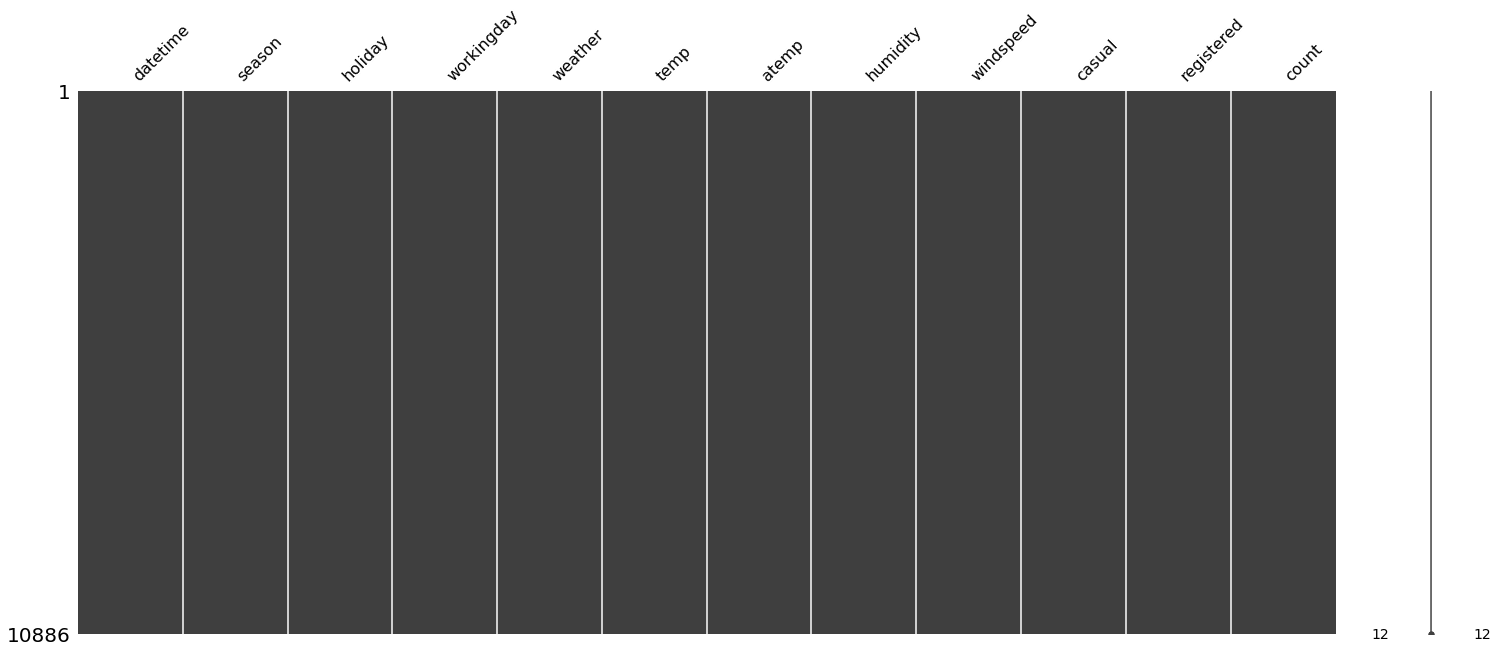

In [10]:
msno.matrix(df)

### Check Datatypes 

In [11]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [12]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.879504,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.238558,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## FEATURE ENGINEERING

### Split DateTime for getting better insights from data 

In [13]:
temp = pd.DatetimeIndex(df['datetime'])
df['year'] = temp.year
df['month'] = temp.month
df['hour'] = temp.hour
df['weekday'] = temp.weekday
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81.000000,0.0,3,13,16,2011,1,0,5
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80.000000,0.0,8,32,40,2011,1,1,5
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80.000000,0.0,5,27,32,2011,1,2,5
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,61.879504,0.0,3,10,13,2011,1,3,5
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75.000000,0.0,0,1,1,2011,1,4,5


### Drop DateTime

In [14]:
df  = df.drop(["datetime"],axis=1)

## EXPLORATORY DATA ANALYSIS - Visualization

### Grouping by season, plot the box plot

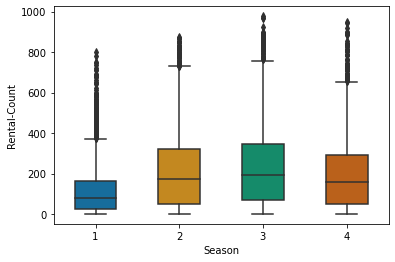

In [15]:
season_group= (df.groupby("season"))["count"].sum()
season_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='season',data=df,width=0.5,palette="colorblind")
plt.xlabel('Season')
plt.ylabel('Rental-Count')
plt.show()

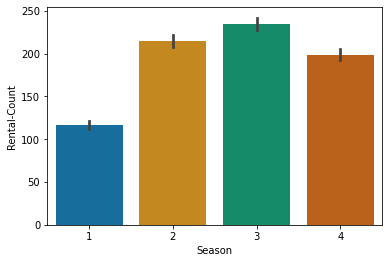

In [16]:
sns.barplot(x='season', y='count', data=df,palette="colorblind")
plt.xlabel('Season')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6, 5)

### Grouping by weekday, plot the box plot

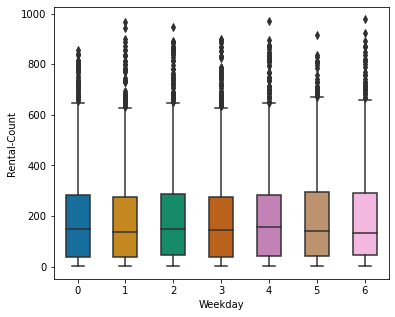

In [17]:
weekday_group= (df.groupby("weekday"))["count"].sum()
weekday_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='weekday',data=df,width=0.5,palette="colorblind")
plt.xlabel('Weekday')
plt.ylabel('Rental-Count')
plt.show()

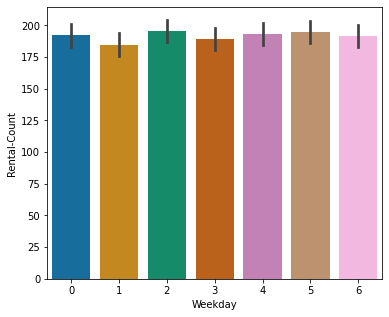

In [18]:
weekday_group= (df.groupby("weekday"))["count"].sum()
weekday_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='weekday',data=df,palette="colorblind")
plt.xlabel('Weekday')
plt.ylabel('Rental-Count')
plt.show()

### Seeing the difference between workday and non-workday 

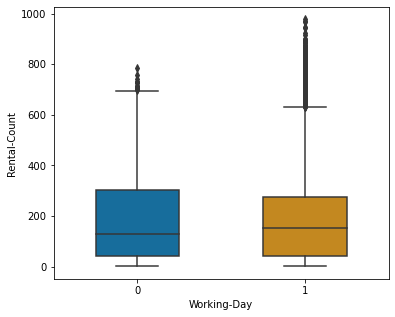

In [19]:
wd_group= (df.groupby("workingday"))["count"].sum()
wd_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='workingday',data=df,width=0.5,palette="colorblind")
plt.xlabel('Working-Day')
plt.ylabel('Rental-Count')
plt.show()

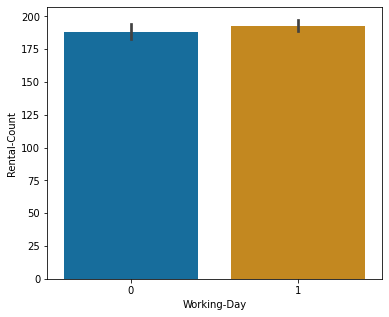

In [20]:
wd_group= (df.groupby("workingday"))["count"].sum()
wd_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='workingday',data=df,palette="colorblind")
plt.xlabel('Working-Day')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6, 5)

### Grouping by weather and plot the box plot 

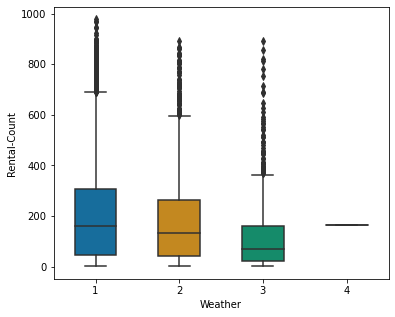

In [21]:
weather_group= (df.groupby("weather"))["count"].sum()
weather_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='weather',data=df,width=0.5,palette="colorblind")
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Weather')
plt.ylabel('Rental-Count')
plt.show()

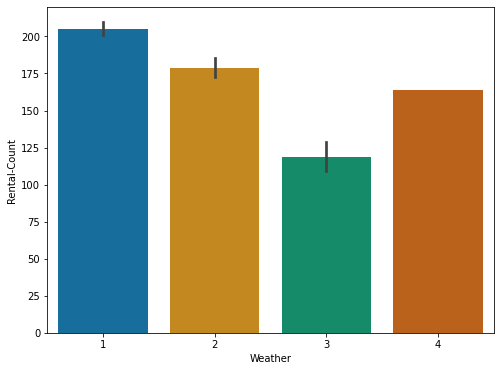

In [22]:
sns.barplot(x='weather', y='count', data=df,palette="colorblind")
plt.xlabel('Weather')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6, 5)

### Group by season and see the difference between the 2 years 

Text(0, 0.5, 'Rental-Count')

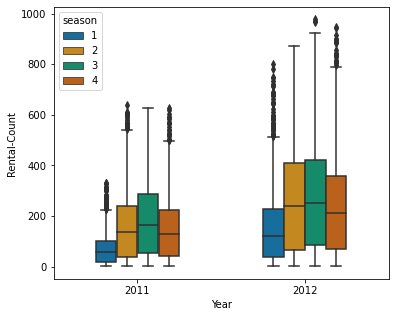

In [23]:
sns.boxplot(y='count',x='year',data=df,hue='season',width=0.5,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')

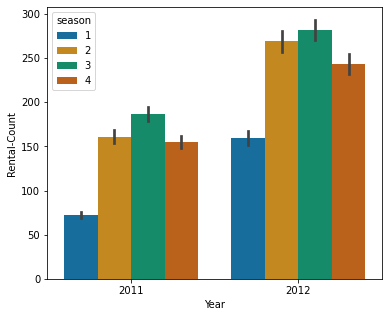

In [24]:
sns.barplot(y='count',x='year',data=df,hue='season',palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (6.5, 6)

### Annual change

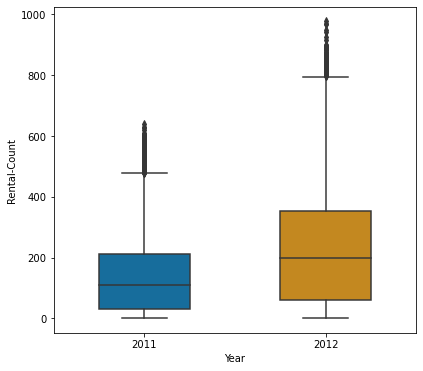

In [25]:
year_group= (df.groupby("year"))["count"].sum()
year_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='year',data=df,width=0.5,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.show()

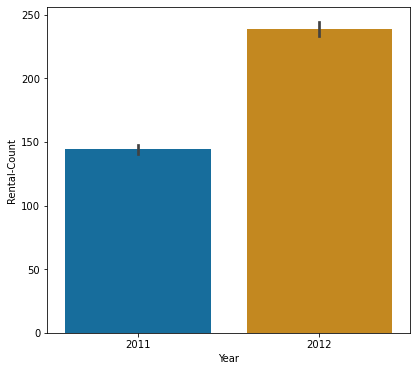

In [26]:
year_group= (df.groupby("year"))["count"].sum()
year_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='year',data=df,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (5, 5)

###  Monthly change

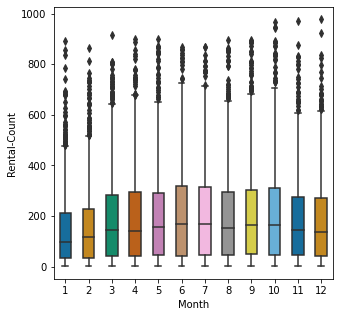

In [27]:
month_group= (df.groupby("month"))["count"].sum()
month_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='month',data=df,width=0.5,palette="colorblind")
plt.xlabel('Month')
plt.ylabel('Rental-Count')
plt.show()

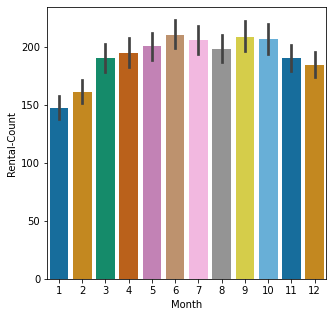

In [28]:
month_group= (df.groupby("month"))["count"].sum()
month_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='month',data=df,palette="colorblind")
plt.xlabel('Month')
plt.ylabel('Rental-Count')
plt.rcParams["figure.figsize"] = (8, 6)

###  Hourly change expressed in bar graph

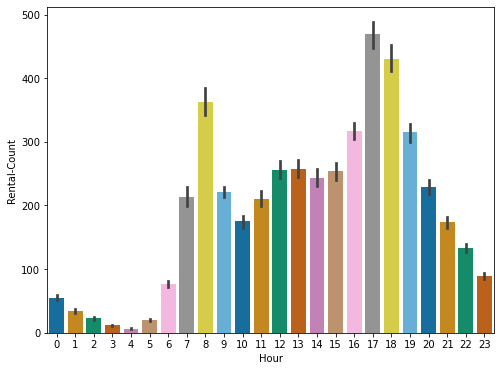

In [29]:
hour_group= (df.groupby("hour"))["count"].sum()
hour_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='hour',data=df,palette="colorblind")
plt.xlabel('Hour')
plt.ylabel('Rental-Count')
plt.show()

# Average Users Count By Hour Of The Day Across Season

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

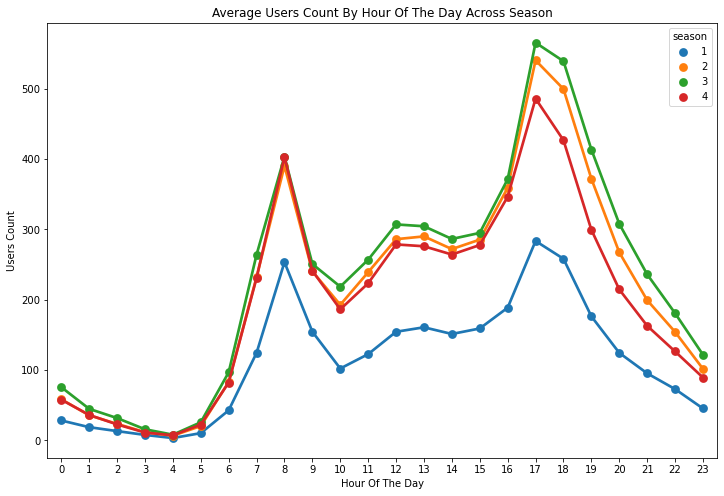

In [30]:
fig,(ax2)= plt.subplots()
fig.set_size_inches(12,8)

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


## MODEL BUILDING 

### Understand dependencies between Attributes

In [31]:
corr = df.corr()
corr.style.background_gradient().set_precision(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
season,1.0,0.0,-0.0,0.0,0.3,0.3,0.2,-0.1,0.1,0.2,0.2,-0.0,0.4,-0.0,-0.0
holiday,0.0,1.0,-0.3,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.1,-0.0,-0.1
workingday,-0.0,-0.3,1.0,0.0,0.0,0.0,-0.0,0.0,-0.3,0.1,0.0,-0.0,0.0,0.0,-0.3
weather,0.0,-0.0,0.0,1.0,-0.1,-0.1,0.4,0.0,-0.1,-0.1,-0.1,-0.0,-0.0,-0.0,-0.0
temp,0.3,0.0,0.0,-0.1,1.0,1.0,-0.1,-0.0,0.5,0.3,0.4,0.1,0.0,0.1,-0.0
atemp,0.3,-0.0,0.0,-0.1,1.0,1.0,-0.0,-0.1,0.5,0.3,0.4,0.1,0.0,0.1,-0.0
humidity,0.2,0.0,-0.0,0.4,-0.1,-0.0,1.0,-0.3,-0.3,-0.3,-0.3,-0.1,0.0,-0.3,-0.0
windspeed,-0.1,0.0,0.0,0.0,-0.0,-0.1,-0.3,1.0,0.1,0.1,0.1,-0.0,-0.0,0.1,-0.0
casual,0.1,0.0,-0.3,-0.1,0.5,0.5,-0.3,0.1,1.0,0.5,0.7,0.1,0.0,0.3,0.1
registered,0.2,-0.0,0.1,-0.1,0.3,0.3,-0.3,0.1,0.5,1.0,1.0,0.3,0.1,0.4,-0.0


### Dependencies using HeatMap 

<AxesSubplot:>

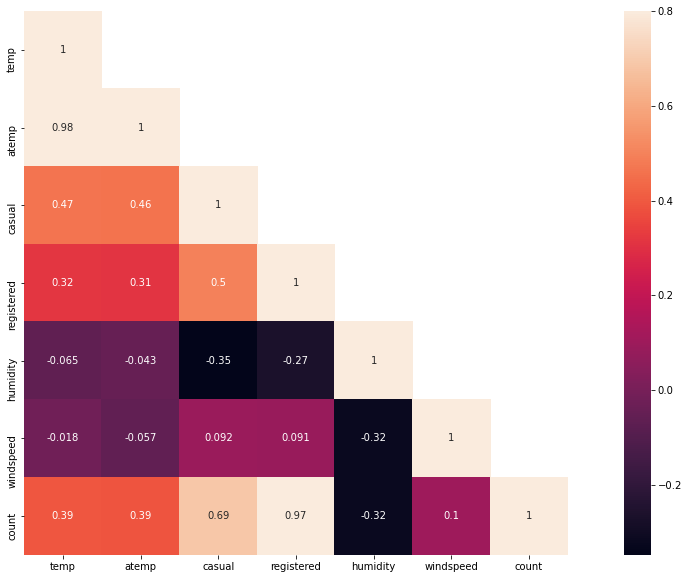

In [32]:
corrMatt = df[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## Linear Regression

In [33]:
cdf = df[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed","count"]]
cdf.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,0,1,9.84,14.395,81.000000,0.0000,16
1,1,0,0,1,9.02,13.635,80.000000,0.0000,40
2,1,0,0,1,9.02,13.635,80.000000,0.0000,32
3,1,0,0,1,9.84,14.395,61.879504,0.0000,13
4,1,0,0,1,9.84,14.395,75.000000,0.0000,1
5,1,0,0,2,9.84,12.880,75.000000,6.0032,1
6,1,0,0,1,9.02,13.635,80.000000,0.0000,2
7,1,0,0,1,8.20,12.880,61.879504,0.0000,3
8,1,0,0,1,9.84,14.395,75.000000,0.0000,8
9,1,0,0,1,13.12,17.425,76.000000,0.0000,14


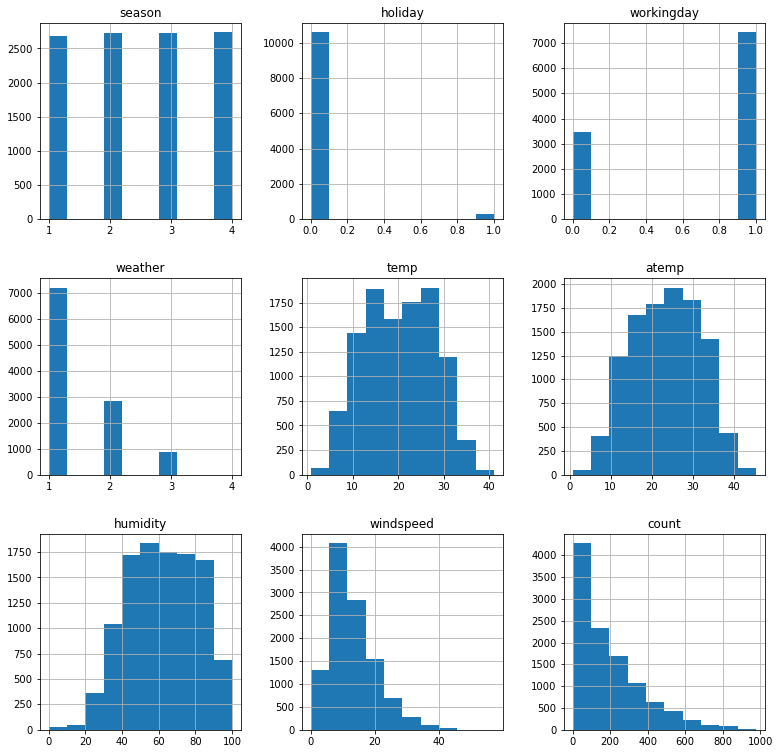

In [34]:
viz = cdf[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed","count"]]
viz.hist(bins=10,figsize=(13,13))
plt.show()

In [82]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [83]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['atemp']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[8.38528347]]
Intercept:  [-6.82556757]


In [107]:
from sklearn.model_selection import train_test_split
x = df[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]]
y = df[["count"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [108]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [109]:
LR_preds = model.predict(x_test)  
np.exp(LR_preds).mean() 
prediction = pd.DataFrame(LR_preds, columns=['predictions']).to_csv('prediction.csv')

In [116]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, LR_preds)

25499.778823895937

In [94]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(x_train[['atemp']])
y = np.asanyarray(y_train[['count']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[8.22831487]]
Intercept:  [-4.37805965]


## Random Forest 

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train) 
RF_preds = model.predict(x_test)  
np.exp(RF_preds).mean() 
prediction2 = pd.DataFrame(LR_preds, columns=['rf_predictions']).to_csv('rf_prediction.csv')

C:\Users\Tauseef Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, RF_preds)

25499.778823895937

## Multiple Regression 

In [45]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]])
y = np.asanyarray(train[["count"]])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 21.85396719 -13.56917359  -2.25088176   3.7533428    2.02744905
    5.49097268  -3.00798459   0.72765705]]


In [46]:
y_hat= regr.predict(test[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]])
x = np.asanyarray(test[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]])
y = np.asanyarray(test[["count"]])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 24964.49
Variance score: 0.27


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed"]])
y = np.asanyarray(train[["count"]])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

In [ ]:
LR_preds = model.predict(dataTest)  
np.exp(LR_preds).mean()

In [47]:
cdf = df[["weather","temp","atemp","humidity","windspeed","count"]]
cdf.head(10)

,weather,temp,atemp,humidity,windspeed,count
0,1,9.84,14.395,81.000000,0.0000,16
1,1,9.02,13.635,80.000000,0.0000,40
2,1,9.02,13.635,80.000000,0.0000,32
3,1,9.84,14.395,61.879504,0.0000,13
4,1,9.84,14.395,75.000000,0.0000,1
5,2,9.84,12.880,75.000000,6.0032,1
6,1,9.02,13.635,80.000000,0.0000,2
7,1,8.20,12.880,61.879504,0.0000,3
8,1,9.84,14.395,75.000000,0.0000,8
9,1,13.12,17.425,76.000000,0.0000,14


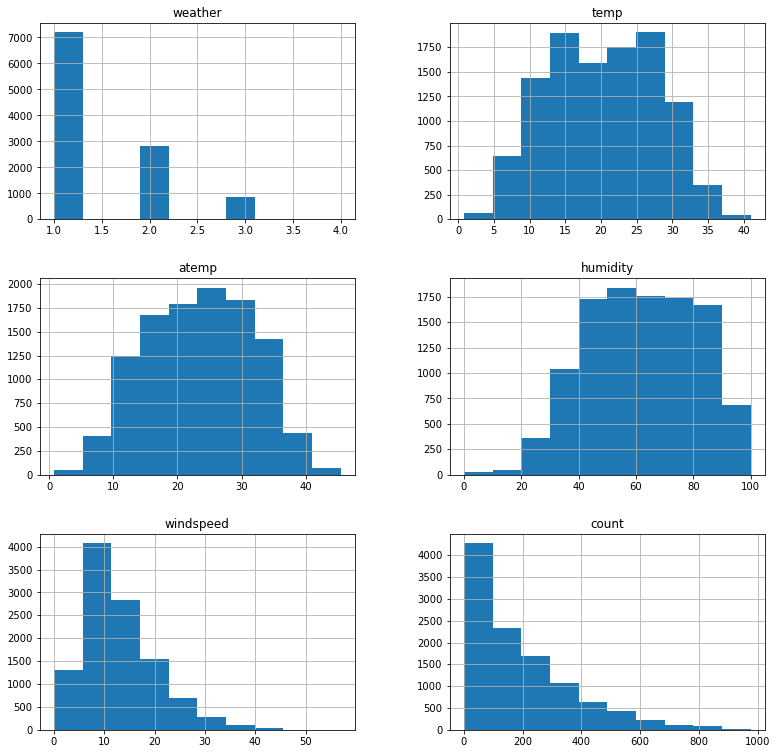

In [48]:
viz = cdf[["weather","temp","atemp","humidity","windspeed","count"]]
viz.hist(bins=10,figsize=(13,13))
plt.show()

In [49]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [50]:
train

,weather,temp,atemp,humidity,windspeed,count
1,1,9.02,13.635,80.000000,0.0000,40
2,1,9.02,13.635,80.000000,0.0000,32
3,1,9.84,14.395,61.879504,0.0000,13
4,1,9.84,14.395,75.000000,0.0000,1
5,2,9.84,12.880,75.000000,6.0032,1
...,...,...,...,...,...,...
10880,1,15.58,19.695,50.000000,23.9994,569
10881,1,15.58,19.695,50.000000,26.0027,336
10882,1,14.76,17.425,57.000000,15.0013,241
10883,1,13.94,15.910,61.000000,15.0013,168


In [51]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['weather']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-38.32992805]]
Intercept:  [246.09425348]


In [52]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['temp']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.16044338]]
Intercept:  [6.61567312]


In [53]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['atemp']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[8.32051598]]
Intercept:  [-4.84764495]


In [54]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['humidity']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-3.05210019]]
Intercept:  [380.47635773]


In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['windspeed']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[2.37818268]]
Intercept:  [161.3583984]


In [ ]:
df_max_scaled = cdf.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
df_max_scaled.plot(kind = 'bar')

In [ ]:
cdf=df_max_scaled.copy()

In [ ]:
viz = cdf[["weather","temp","atemp","humidity","windspeed","count"]]
viz.hist(bins=10,figsize=(13,13))
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
train

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['weather']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['temp']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['atemp']])
train_y = np.asanyarray(train[['count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)